# Radiomics fundus EDA


## 1. Basic Exploratory Data Analysis

### 1) Importing Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

### 2) Reading the train.csv

In [2]:
df = pd.read_csv("../data/radiomics_fundus_ds.csv")
print('Shape of data set : ', df.shape)
df.head()

Shape of data set :  (563, 59)


cl  SID OSOD  calc_energy  calc_entropy  calc_kurtosis  calc_meanDeviation  \
0   1    1   OD   2066538932      7.014756       0.411199           31.690719   
1   1    1   OS   1720730554      6.800589       0.822906           34.469422   
2   1    1   OS   2873361288      7.027502      -0.160601           31.137301   
3   0   10   OD   1051579746      6.636076       1.633546           24.896078   
4   0   10   OD   1631341010      6.775611       0.479087           26.728662   

   calc_skewness  calc_uniformity   calc_mean  ...     glszm_LAE    glszm_IV  \
0       1.084310         0.009910  136.229668  ...  10565.919598  298.472882   
1       1.062343         0.011695  120.755098  ...  43375.033498  237.814937   
2       0.757661         0.008954  162.640508  ...  13704.165624  284.869190   
3       0.736516         0.013695   94.647520  ...  91172.115849  174.311301   
4       1.134152         0.011387  121.456172  ...  18352.116481  244.371334   

     glszm_SZV  glszm_ZP  glszm_LIE   glszm_HIE  glszm_LISAE  glszm_HISAE  \
0  1194.604228  0.056357   0.012563  209.892740     0.005866    95.506877   
1   807.249314  0.035566   0.005960  280.179023     0.003166   130.304171   
2  1261.853135  0.057783   0.011966  238.122021     0.006100   109.644555   
3   468.149254  0.027480   0.009699  264.879531     0.005533   101.066917   
4   874.140438  0.047285   0.017183  187.798017     0.007193    78.282727   

   glszm_LILAE   glszm_HILAE  
0   148.524526  1.981000e+06  
1   483.789165  1.168581e+07  
2    81.995487  5.546093e+06  
3  2924.251332  1.597173e+07  
4   399.315892  2.267383e+06  

[5 rows x 59 columns]

In [3]:
df.groupby(['cl']).count()["OSOD"].to_frame()

OSOD
cl      
0    213
1    350

위의 내용을 통해서 라벨이 imbalance 하다는 사실을 알 수 있었습니다.

## 2. Data Exploration

### 1) Check data set Info

In [4]:
print('Data Set !!')
print(df.info())

Data Set !!
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 563 entries, 0 to 562
Data columns (total 59 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   cl                      563 non-null    int64  
 1   SID                     563 non-null    int64  
 2   OSOD                    563 non-null    object 
 3   calc_energy             563 non-null    int64  
 4   calc_entropy            563 non-null    float64
 5   calc_kurtosis           563 non-null    float64
 6   calc_meanDeviation      563 non-null    float64
 7   calc_skewness           563 non-null    float64
 8   calc_uniformity         563 non-null    float64
 9   calc_mean               563 non-null    float64
 10  calc_median             563 non-null    int64  
 11  calc_max                563 non-null    int64  
 12  calc_min                563 non-null    int64  
 13  calc_variance           563 non-null    float64
 14  calc_RMS                563 no

위의 결과를 볼 때 다음과 같은 내용을 유추할 수 있었습니다.
 - null값이 없다.
 - 사실상 57개의 유의미한 feature들로 이루어져 있으며, 이는 calc, glcm, glrlm, glszm 이라는 큰 분류로 나눌 수 있다.

### 2) PCA info

In [5]:
x = df.drop(['cl'], axis=1) # 독립변인들의 value값만 추출
y = df['cl'] # 종속변인 추출

In [6]:
std_features = ['calc_energy', 'calc_entropy', 'calc_kurtosis',
       'calc_meanDeviation', 'calc_skewness', 'calc_uniformity', 'calc_mean',
       'calc_median', 'calc_max', 'calc_min', 'calc_variance', 'calc_RMS',
       'calc_sd', 'glcm_mean', 'glcm_variance', 'glcm_autoCorrelation',
       'glcm_cProminence', 'glcm_cShade', 'glcm_cTendency', 'glcm_contrast',
       'glcm_correlation', 'glcm_differenceEntropy', 'glcm_dissimilarity',
       'glcm_energy', 'glcm_entropy', 'glcm_homogeneity1', 'glcm_homogeneity2',
       'glcm_IDMN', 'glcm_IDN', 'glcm_inverseVariance', 'glcm_maxProb',
       'glcm_sumAverage', 'glcm_sumEntropy', 'glcm_sumVariance', 'glrlm_GLN',
       'glrlm_HGLRE', 'glrlm_LRE', 'glrlm_LRHGLE', 'glrlm_LRLGLE',
       'glrlm_LGLRE', 'glrlm_RLN', 'glrlm_RP', 'glrlm_SRE', 'glrlm_SRHGLE',
       'glrlm_SRLGLE', 'glszm_SAE', 'glszm_LAE', 'glszm_IV', 'glszm_SZV',
       'glszm_ZP', 'glszm_LIE', 'glszm_HIE', 'glszm_LISAE', 'glszm_HISAE',
       'glszm_LILAE', 'glszm_HILAE']

In [7]:
x[std_features] = StandardScaler().fit_transform(x[std_features]) # x객체에 x를 표준화한 데이터를 저장

In [8]:
pca = PCA(n_components=2)

printcipalComponents = pca.fit_transform(x[std_features])

pca.explained_variance_ratio_

array([0.36639532, 0.19337706])

In [9]:
pc_y = np.c_[printcipalComponents,y]
df = pd.DataFrame(pc_y,columns=['PC1','PC2','diagnosis'])

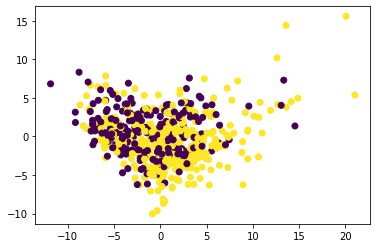

In [10]:
plt.scatter(x=df['PC1'],y=df['PC2'],c=df['diagnosis'])

In [11]:
pca = PCA(n_components=0.95)

printcipalComponents = pca.fit_transform(x[std_features])

pca.explained_variance_ratio_

array([0.36639532, 0.19337706, 0.10751593, 0.08033768, 0.07342996,
       0.0380633 , 0.03104666, 0.02693872, 0.02190731, 0.01230566])

위의 결과로 미루어 보아 다음과 같은 판단을 하였습니다.
 - 2개 수준의 간단한 성분으로는 충분히 좋은 결과를 보장하지 못한다.
 - 약 5~10개 정도의 성분을 이용하는 것이 좋아보인다.

## 3. 모델 개발의 방향성

- 해결해야 할 문제
 1. 데이터 불균형 해소
 2. 적절한 feature의 갯수 탐색
 3. 적절한 fea

- 해결해야 할 문제
 1. 데이터 불균형 해소
 2. 적절한 feature의 갯수 탐색
 3. 적절한 fea